In [1]:
# Import libraries needed,
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
#Loading the data using pandas
dataset=pd.read_csv('readmission.csv')

In [3]:
#Exploring the data further
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
dataset[:10].T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [5]:
#Dealing with missing values
df = dataset.copy() 
Rep = df.replace('?', np.NaN) 
nacheck = Rep.isnull().sum() 
nacheck

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
#Dropping "Weight,payer_code and medical_specialty" as they have too many missing values, it would be best to remove these.
df= df.drop(['weight','payer_code','medical_specialty'],axis=1)

In [7]:
df[:5]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [9]:
#We can see we have 3 types of values 'NO','>30','<30'.
df['30 readmitted'] = np.where(df['readmitted'] == 'NO', 0, 1)

In [10]:
df.groupby('30 readmitted').size()

30 readmitted
0    54864
1    46902
dtype: int64

In [11]:
# Removing the pateints from the dataset that are dead.
df = df[((df.discharge_disposition_id != 11)&(df.discharge_disposition_id != 13)&(df.discharge_disposition_id != 14)&
         (df.discharge_disposition_id != 19)&(df.discharge_disposition_id != 20)&(df.discharge_disposition_id != 21))]

In [12]:
df[:10].T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [13]:
drop_Idx =set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.loc[new_Idx]

In [14]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())   

race 2152
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


In [15]:
import seaborn as sns

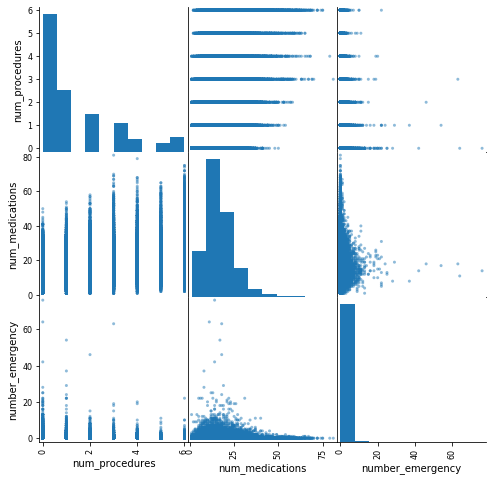

In [16]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between two variables then we can consider one of them.
sm =pd.plotting.scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

In [17]:
# we can see that there is no problem of multi-collinearity

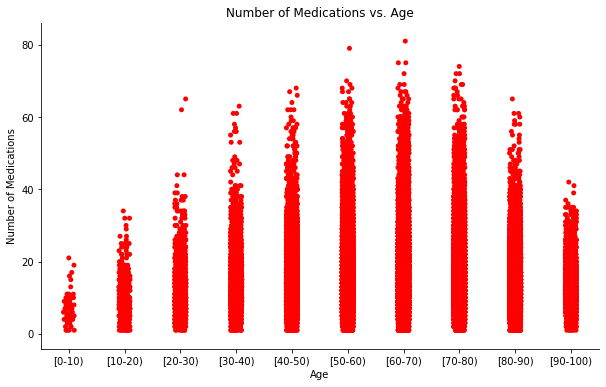

In [18]:
#Let's try to see how the age and number of medicines vary
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine()
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

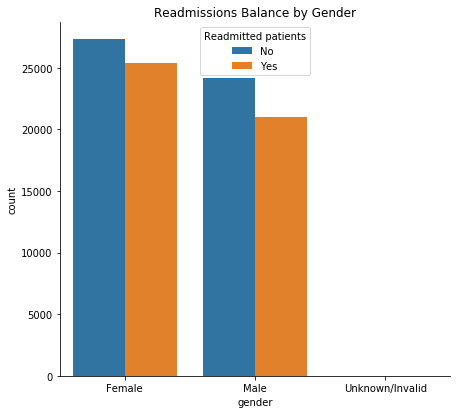

In [19]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = '30 readmitted', data = df) 
sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

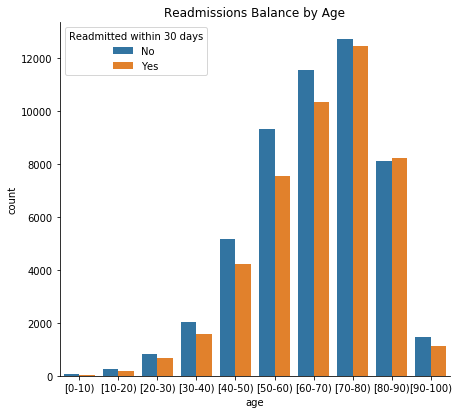

In [20]:
#Relation between age and readmission,
b = df.age.unique()
b.sort()
b_sort = np.array(b).tolist()
ageplt = sns.countplot(x = 'age', hue = '30 readmitted', data = df, order = b_sort) 
sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

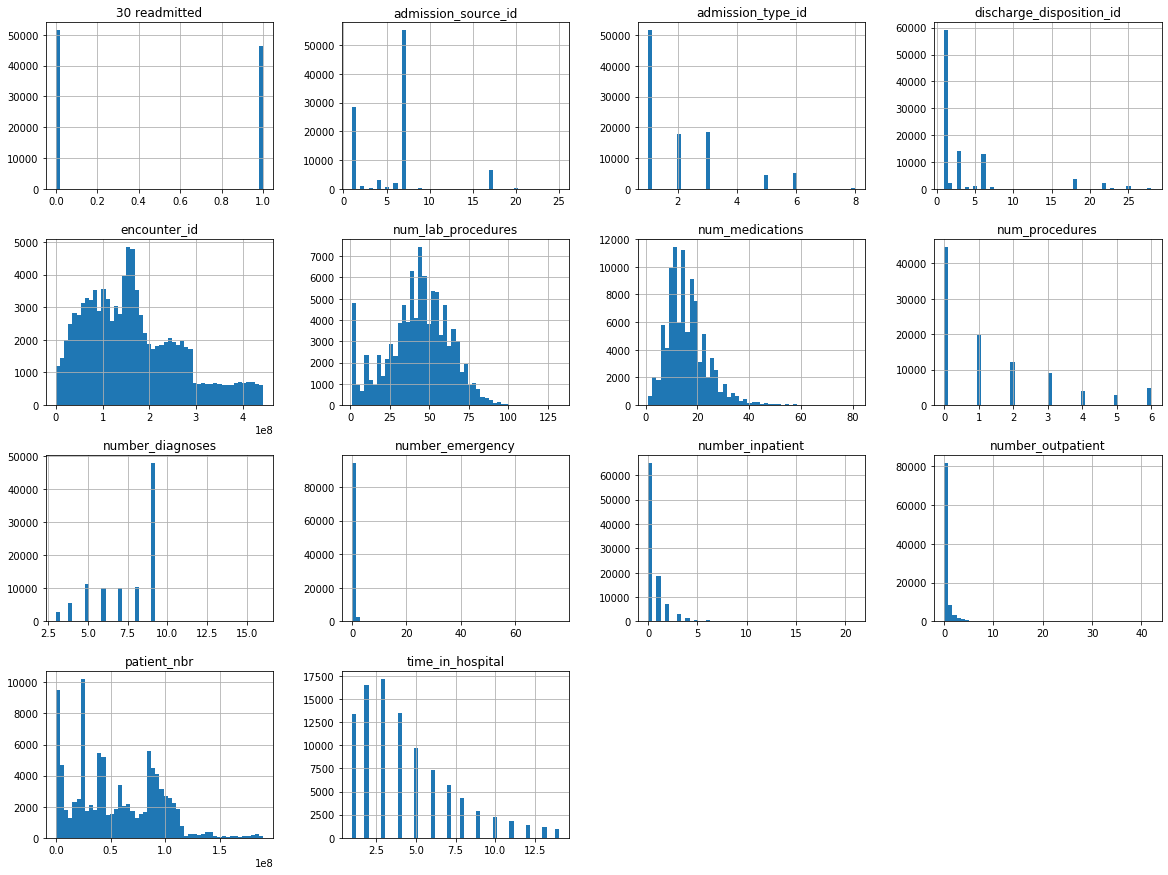

In [21]:
#Plotting the numerical variables in our dataset,
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

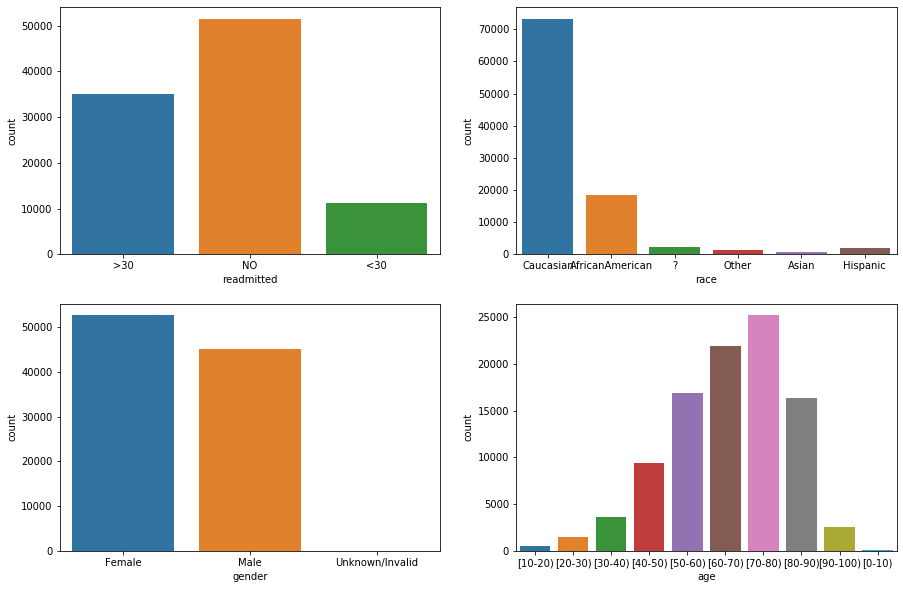

In [22]:
#Exploring the categorical variables
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

Text(0.5, 1.0, 'Time in Hospital VS. Frequency')

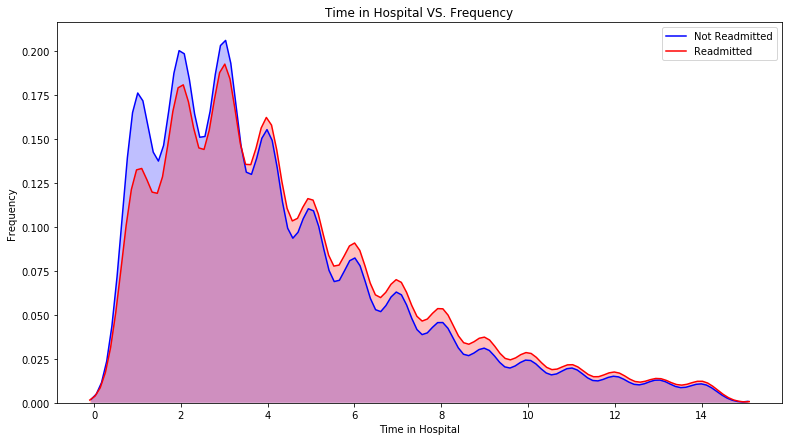

In [31]:
fig = plt.figure(figsize=(13,7))
ax=sns.kdeplot(df.loc[(df['30 readmitted'] == 0),'time_in_hospital'] , color='blue',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['30 readmitted'] == 1),'time_in_hospital'] , color='red',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Frequency')

In [23]:
#Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown
numcolumn = df.select_dtypes(include = [np.number]).columns
objcolumn = df.select_dtypes(include = ['object']).columns
df[numcolumn] = df[numcolumn].fillna(0)
df[objcolumn] = df[objcolumn].fillna("unknown")

In [25]:
#Encoding the data
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('skin', (709 - 629)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
def codemap(df, codes):
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp    
    return df 
listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
df[listcol] = codemap(df[listcol], codes)

C:\Users\91767\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [26]:
#Now let's look at the dataset again and drop the irrelevant columns
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender       age  \
1             149190     55629189        Caucasian  Female   [10-20)   
2              64410     86047875  AfricanAmerican  Female   [20-30)   
3             500364     82442376        Caucasian    Male   [30-40)   
4              16680     42519267        Caucasian    Male   [40-50)   
5              35754     82637451        Caucasian    Male   [50-60)   
6              55842     84259809        Caucasian    Male   [60-70)   
7              63768    114882984        Caucasian    Male   [70-80)   
8              12522     48330783        Caucasian  Female   [80-90)   
9              15738     63555939        Caucasian  Female  [90-100)   
10             28236     89869032  AfricanAmerican  Female   [40-50)   
11             36900     77391171  AfricanAmerican    Male   [60-70)   
12             40926     85504905        Caucasian  Female   [40-50)   
13             42570     77586

In [27]:
d1 = df.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

In [28]:
#Normalization of the data
from sklearn.preprocessing import StandardScaler
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
normal = StandardScaler()
d1[listnormal] = normal.fit_transform(d1[listnormal])
d1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30 readmitted
count,97825.000000,97825.000000,9.782500e+04,9.782500e+04,9.782500e+04,9.782500e+04,9.782500e+04,9.782500e+04,9.782500e+04,9.782500e+04,97825.000000
mean,3.529139,5.737000,1.277683e-14,3.230377e-16,-1.843031e-14,-9.413579e-16,1.056638e-13,-3.064292e-14,2.950893e-14,1.593999e-13,0.473672
std,5.184435,4.064016,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499309
min,1.000000,1.000000,-1.144316e+00,-2.139031e+00,-7.874441e-01,-1.865136e+00,-2.928397e-01,-2.121835e-01,-5.037590e-01,-2.425453e+00,0.000000
25%,1.000000,1.000000,-8.081386e-01,-6.105538e-01,-7.874441e-01,-6.280231e-01,-2.928397e-01,-2.121835e-01,-5.037590e-01,-8.003534e-01,0.000000
50%,1.000000,7.000000,-1.357837e-01,5.178618e-02,-2.019588e-01,-1.331782e-01,-2.928397e-01,-2.121835e-01,-5.037590e-01,2.830461e-01,0.000000
75%,3.000000,7.000000,5.365712e-01,7.141261e-01,3.835265e-01,4.853780e-01,-2.928397e-01,-2.121835e-01,2.897139e-01,8.247458e-01,1.000000
max,28.000000,25.000000,3.225991e+00,4.535318e+00,2.725468e+00,8.031764e+00,3.272426e+01,8.055790e+01,1.615917e+01,4.616644e+00,1.000000


In [29]:
#Let's store readmitted in y and rest of the columns in X
Y = d1['30 readmitted']
X = d1.drop(['30 readmitted'], axis =1)
X = pd.get_dummies(X)

In [ ]:
#Splitting the data into training and vallidation data sets. 
#The training data will contain 80 % of the data and validation will contain remaining 20%

In [30]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2,random_state = 7, stratify = Y)
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (78260, 163) (19565, 163)


# Logistic Regression

In [32]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

C:\Users\91767\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6169690774341937


In [34]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8095 2203]
 [5291 3976]]


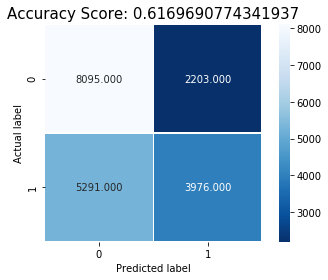

In [35]:
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [36]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.60      0.79      0.68     10298
         YES       0.64      0.43      0.51      9267

    accuracy                           0.62     19565
   macro avg       0.62      0.61      0.60     19565
weighted avg       0.62      0.62      0.60     19565



In [37]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

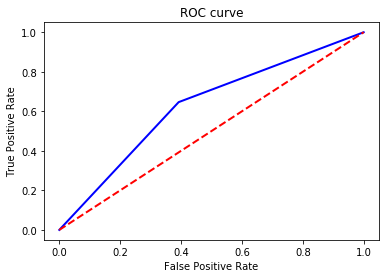

In [38]:
#Computing false and true positive rates
from sklearn.metrics import roc_curve
fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
#Lets try some other models

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [40]:
#Calculating the score
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [41]:
#Checking the accuracy,
print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6274980833120368


In [42]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7271 3027]
 [4261 5006]]


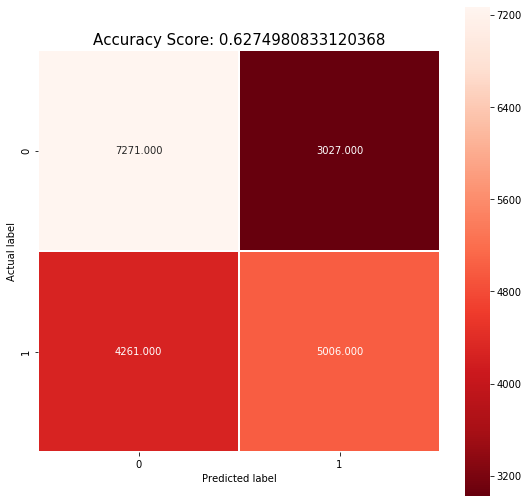

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [45]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.63      0.71      0.67     10298
         YES       0.62      0.54      0.58      9267

    accuracy                           0.63     19565
   macro avg       0.63      0.62      0.62     19565
weighted avg       0.63      0.63      0.62     19565



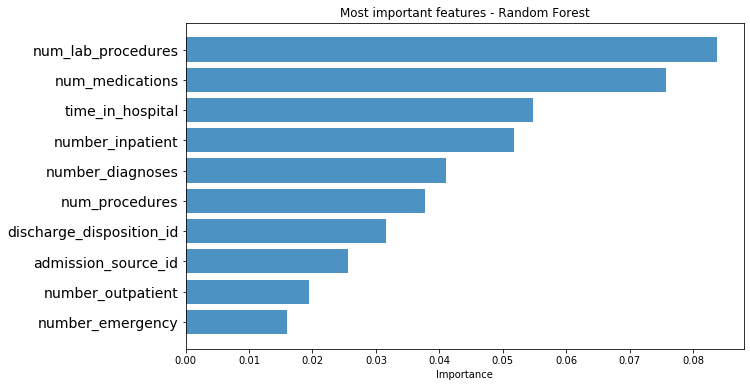

In [46]:
#Determining which features are most important
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# AdaBoosted Classification model

In [47]:
#Creating a AdaBoosted Classification model
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(Xtrain, Ytrain)
yadaclas = adaclass.predict(Xtest)
print("The accurary of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest))

The accurary of AdaBoosted Classification model:  0.6136979299769998


In [48]:
#Checking the confusion matrix,
print(confusion_matrix(Ytest, yadaclas))

[[8038 2260]
 [5298 3969]]


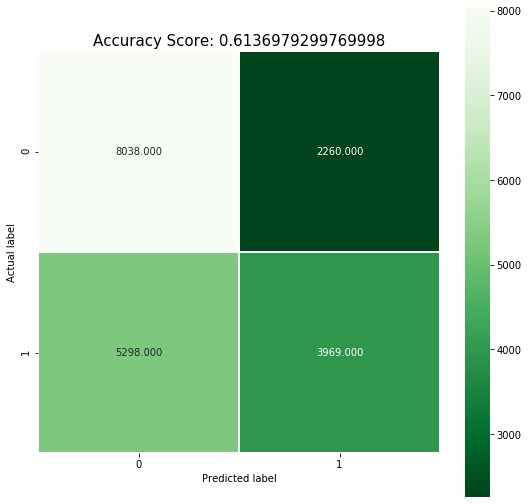

In [49]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

# Decision tree

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [51]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [52]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 0, 1, ..., 0, 0, 1])

In [53]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  61.236902632251464


# Comparing the models

In [54]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(Ytest, yadaclas)#Ada boost classifier
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )

C:\Users\91767\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'True Positive Rate')

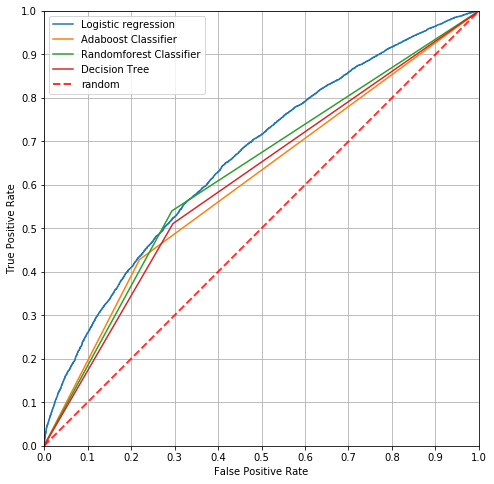

In [55]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [56]:
print(" Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print("Accuracy of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest)*100)
print( "Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

 Accuracy of Logistic regression model: 61.696907743419374
Accuracy of Random forest classification:  62.74980833120368
Accuracy of AdaBoosted Classification model:  61.36979299769998
Accuracy of Decision Tree  61.236902632251464


# Summary

###### From the above we can see that the accuracy levels of AdaBoost after tuning and Random forest is among the best, about 62.7%.
###### The accuracy of all the models are similar and ranges between 61-62%. Further, applying more pre-processing techniques might help. The dataset needs more data cleaning and data fitting to achieve a higher degree of accuracy.While readmission rates remained the highest for patients with circulatory diagnoses than readmission rates for patients with diabetes .
###### The strong predictors are Logistic regression,Random forest,Decission Tree,AdaBoosted Classification model .The above visual helps us in seeing the accuracy and the ROC curver further helps us decide the performance of different models.
